<center> <h1>Podatkovno rudarjenje (PR)</h1>
    <br>
    <br>
<h3>Univerza v Ljubljani</h3>
<h3>Fakulteta za računalništvo in informatiko</h3>

##### Skupina:
 - Žiga Šolar	(zs3653@student.uni-lj.si)
 - Andraž Simčič (as7495@student.uni-lj.si)
 - Simon Klemenčič (sk0014@student.uni-lj.si)
 - Nejc Kozjek (nk4370@student.uni-lj.si)
 

##### Kratek opis naloge:

Namen naše naloge je analiza razvoja športnikov in športov na osnovi podatkov z Olimpijskih iger od leta 1896 v Atenah do leta 2016 v Riu (120 let).
Olimpijske igre so športni dogodek, ki se odvija vsako četro leto. Poznamo zimske in letne Olimpijske igre. Popularne so zaradi raznolike ponudbe zimskih in letnih športov, kot so smučanje, plavanje, košarka, nogomet, itd.

##### Cilji:

Iz podatkov bomo poskusili izluščiti naslednje informacije:
 - primerjava telesnih karakteristik med različnimi športi
 - primerjava telesnih karakteristik uspešnejših športnikov/ekip
 - primerjava telesnih karakteristik istih športov skozi čas
 - napoved uspešnosti športnika glede na njegove telesne karakteristike
 - starostna porazdelitev športnikov med različnimi športi
 - uspešnost držav na Olimpijskih igrah
 - analiza Slovenije na Olimpijskih igrah (kje smo uspešni, zakaj?)

##### Vir in oblika podatkov:
 
Podatkovno zbirko bomo pridobili iz spletnega portala Kaggle (https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2?) kjer so podatki na razpolago v formatu "csv".

### Uvoz knjižnic in podatkov

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time
import imageio
import tempfile
import os
import shutil
from collections import OrderedDict
from collections import defaultdict
from tempfile import mkstemp

raw_data = pd.read_csv("Data/athlete_events.csv")
raw_regions = pd.read_csv("Data/noc_regions.csv")

### Priprava podatkov

Podatke dobimo razdeljene v dveh ".csv" datotekah. Podatke združimo v eno tabelo, za bolj pregleden pogled držav iz katerih prihajajo športniki.

In [2]:
all_raw_data = pd.merge(raw_data, raw_regions, on="NOC")
all_raw_data.head(1)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   

   Season       City       Sport                        Event Medal region  \
0  Summer  Barcelona  Basketball  Basketball Men's Basketball   NaN  China   

  notes  
0   NaN

### Osnovna analiza

Prikaz povprečnih starosti športnikov glede na šport.

Analiza je pokazala zanimiv rezultat, saj so pri določenih športih na Olimpijskih igrah tekmovali tudi starejši športniki, vendar predvsem v športih, ki v sodobnem času niso več del iger. Izstopa kriket (Roque), kjer je bila povprečna starost tekmovalcev kar 53,3 let. Najmanjša povprečna starost tekmovalcev pa je v ritmični gimnastiki in sicer 18,74 let. Podrobnosti povprečnih starosti drugih športov so prikazane v grafu.

In [3]:
starost_sport = all_raw_data[["Sport","Age"]]
starost_sport = starost_sport.groupby("Sport")["Age"].mean().reset_index()
starost_sport["Age"] = starost_sport["Age"].round(2)
starost_sport  = starost_sport.sort_values(by="Age", ascending=False)

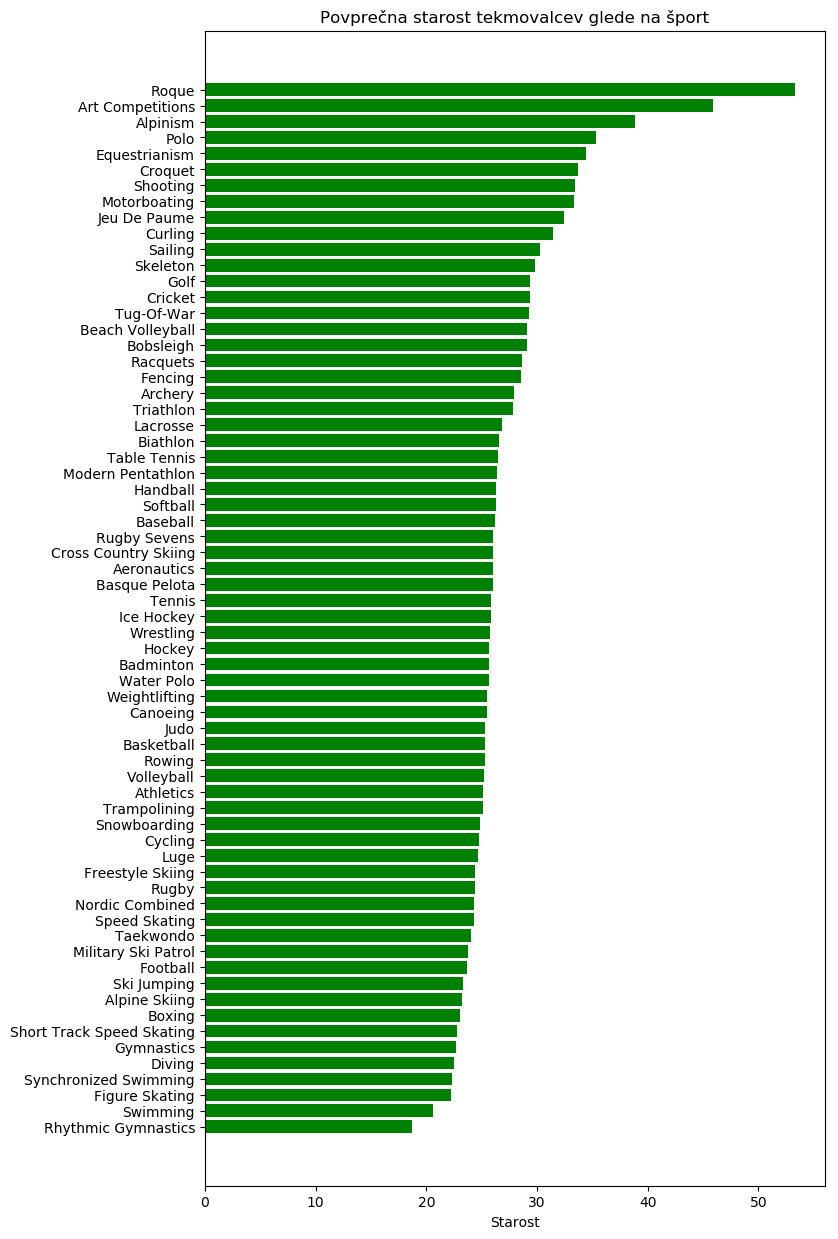

In [4]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 15))

sporti = np.arange(len(starost_sport["Sport"]))

#nastavi znacilnosti grafa
ax.barh(sporti, starost_sport["Age"],height=0.8, align="center", color="green")

#nastavi Y os
ax.set_yticks(sporti)
ax.set_yticklabels(starost_sport["Sport"])
ax.invert_yaxis()

#nastavi naslove
ax.set_xlabel("Starost")
ax.set_title("Povprečna starost tekmovalcev glede na šport")

plt.show()
#fig.savefig('Slike/avg_starost_tekmovalcev.png', bbox_inches="tight")

Prikaz povprečnih višin športnikov glede na šport.

Ta analiza je prikazala pričakovan rezultat, da se najvišji športniki ukvarjajo s košarko. Njihova povprečna višina je kar 190,9 cm. Med višje športnike sodijo tudi tisti, ki se ukvarjajo z odbojko, vaterpolom, veslanjem in rokometom. Najnižji športniki so tisti, ki se ukvarjajo z gimnastiko, trampolinom ali potapljanjem. Druge podrobnosti so razvidne iz grafa, pri čemer za nekatere športe ni bilo podatkov.

In [5]:
visina_sport = all_raw_data[["Sport","Height"]]
visina_sport = visina_sport.groupby("Sport")["Height"].mean().reset_index()
visina_sport["Height"] = visina_sport["Height"].round(2)
visina_sport  = visina_sport.sort_values(by="Height", ascending=False)

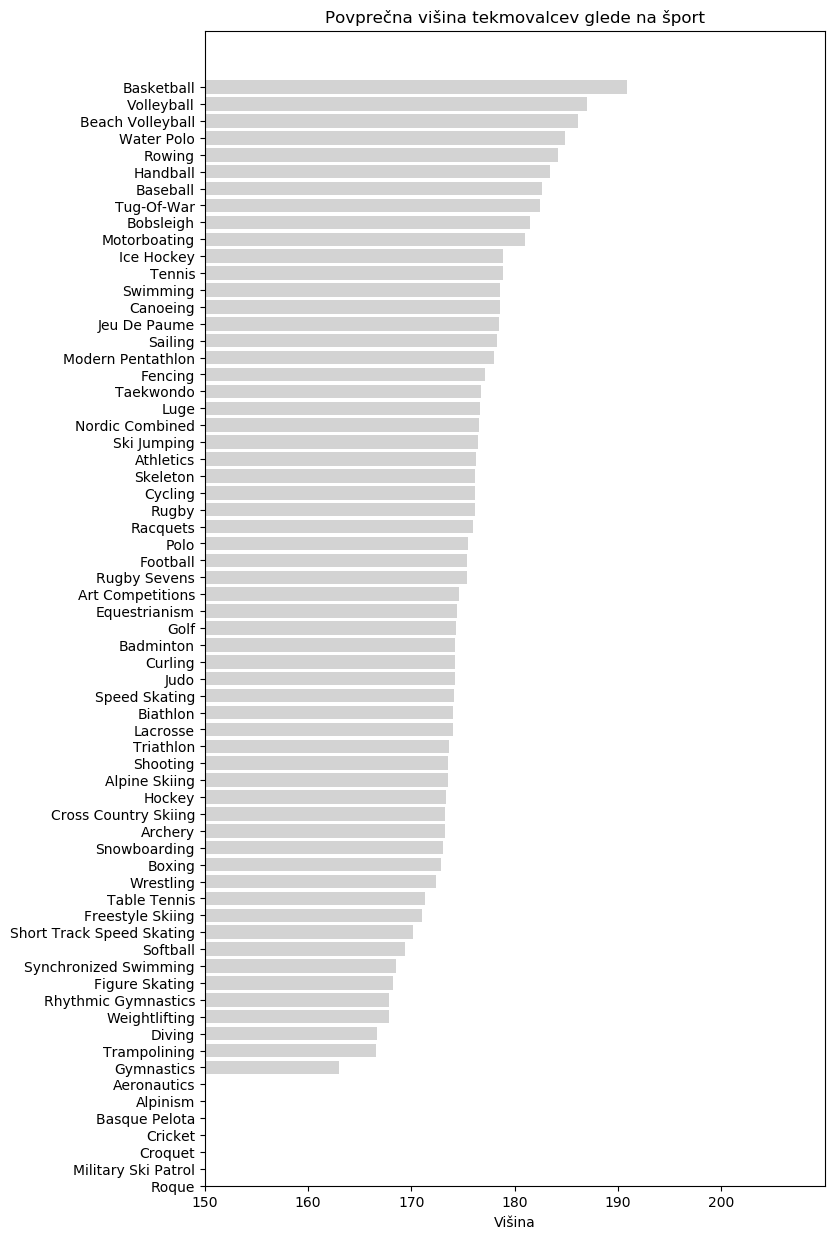

In [6]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 15))

sporti = np.arange(len(visina_sport["Sport"]))
xOS = np.arange(150,210,step=10)

#nastavi znacilnosti grafa
ax.barh(sporti, visina_sport["Height"],height=0.8, align="center", color="lightgrey")

#nastavi Y os
ax.set_yticks(sporti)
ax.set_yticklabels(visina_sport["Sport"])
ax.invert_yaxis()

#nastavi X os
#ax.set_xticks(xOS)
ax.set_xlim((150, 210))
ax.set_xticks(xOS,False)

#nastavi naslove
ax.set_xlabel("Višina")
ax.set_title("Povprečna višina tekmovalcev glede na šport")

plt.show()
#fig.savefig('Slike/avg_visina_tekmovalcev.png', bbox_inches="tight")

Prikaz povprečne teže igralcev glede na šport.

Tudi pri tej analizi so bili najtežji športniki tisti, ki so se ukvarjali s kriketom (Roque). Ta šport ni več prisoten na Olimpijskih igrah. Najlažji športniki na grafu so presenetljivo nogometaši, vendar smo z dodatno analizo ugotovili, da je podatek pri enem od nogometašev zagotovo napačen (pri 183 cm višine ima vpisanih le 28 kg), kar nekaj pa je vpisanih tudi ženskih nogometašic, ki tehtajo manj kot 50 kg. Druge podrobnosti so razvidne iz grafa, pri čemer za nekatere športe ni bilo podatkov.

In [7]:
neki = all_raw_data[all_raw_data["Sport"]=="Football"]
neki[neki["Weight"]<50].head(2)

ID                            Name Sex   Age  Height  Weight  \
33338  134370  Albert Ferdinand "Al" Zerhusen   M  24.0   183.0    28.0   
90563   16449    Diego Mario Buonanotte Rende   M  20.0   160.0    49.0   

                Team  NOC        Games  Year  Season       City     Sport  \
33338  United States  USA  1956 Summer  1956  Summer  Melbourne  Football   
90563      Argentina  ARG  2008 Summer  2008  Summer    Beijing  Football   

                         Event Medal     region notes  
33338  Football Men's Football   NaN        USA   NaN  
90563  Football Men's Football  Gold  Argentina   NaN

In [8]:
teza_sport = all_raw_data[["Sport","Weight"]]

teza_sport = teza_sport[teza_sport["Weight"]!=0].groupby("Sport")["Weight"].mean().reset_index()
teza_sport["Weight"] = teza_sport["Weight"].round(2)
teza_sport  = teza_sport.sort_values(by="Weight", ascending=False)

#teza_sport = teza_sport.groupby("Sport")["Weight"].mean().reset_index()
#teza_sport["Weight"] = teza_sport["Weight"].round(2)
#teza_sport  = teza_sport.sort_values(by="Weight", ascending=False)

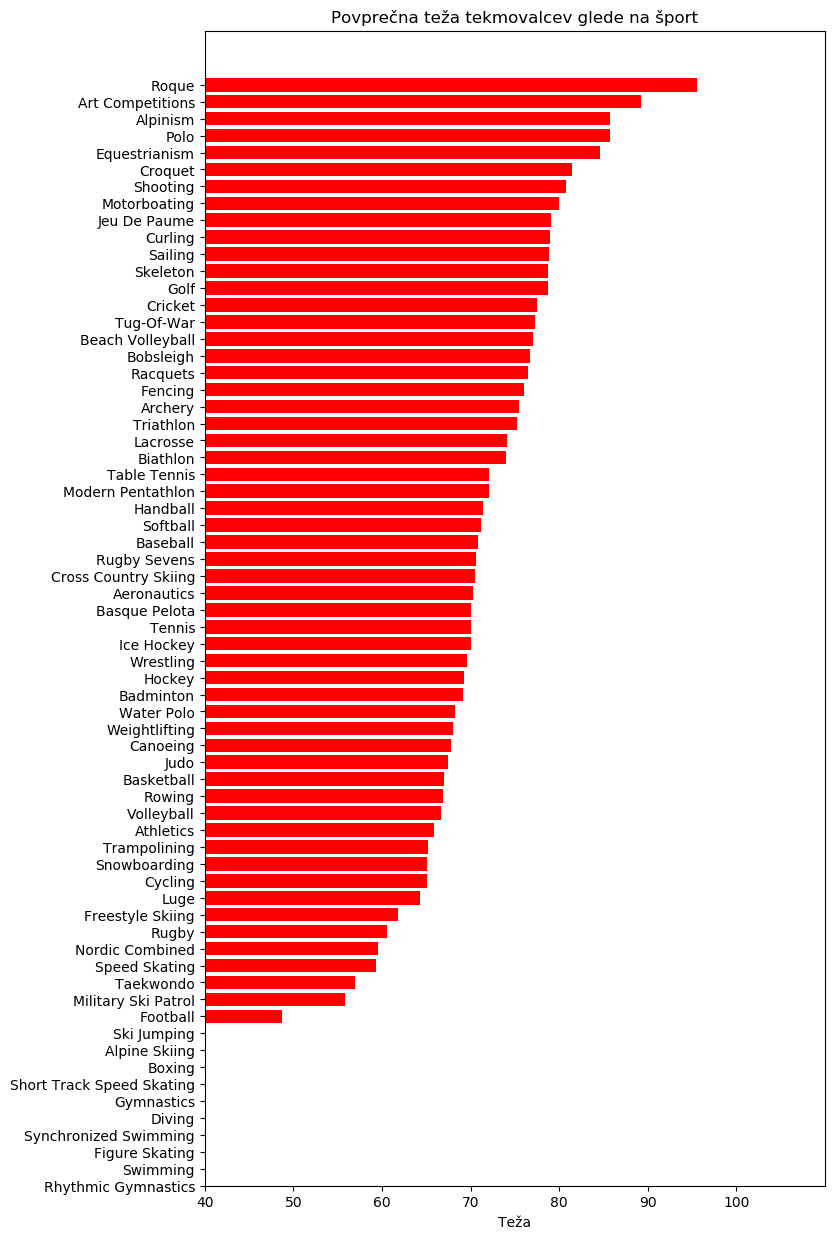

In [9]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 15))

sporti = np.arange(len(teza_sport["Sport"]))
xOS = np.arange(40,101,step=10)

#nastavi znacilnosti grafa
ax.barh(sporti, teza_sport["Weight"],height=0.8, align="center", color="red")

#nastavi Y os
ax.set_yticks(sporti)
ax.set_yticklabels(starost_sport["Sport"])
ax.invert_yaxis()

#nastavi X os
ax.set_xlim((40, 110))
ax.set_xticks(xOS,False)

#nastavi naslove
ax.set_xlabel("Teža")
ax.set_title("Povprečna teža tekmovalcev glede na šport")

plt.show()
#fig.savefig('Slike/avg_teza_tekmovalcev.png', bbox_inches="tight")

Prikaz držav, ki imajo največ medalj.

V tej analizi so upoštevane vse medalje, ne glede na barvo. Najuspešnejše so Združene države Amerike s 5219 osvojenimi medaljami. V tabeli je izpisanih najuspešnejših 10 držav, poleg njih pa še Slovenija s svojimi 48 medaljami. Podrobnosti so razvidne iz tabele.

In [10]:
team_medal = all_raw_data[["Team","Medal"]]
medals_teams = team_medal.groupby("Team").count().reset_index()
medals_teams = medals_teams.sort_values(by="Medal", ascending=False)

medals_teams = medals_teams[medals_teams["Medal"] != 0]
top10_medals_teams = medals_teams.head(10)
top10_medals_teams = top10_medals_teams.append(medals_teams[medals_teams["Team"] == "Slovenia"])

In [11]:
top10_medals_teams

Team  Medal
1090  United States   5219
971    Soviet Union   2451
398         Germany   1984
412   Great Britain   1673
361          France   1550
506           Italy   1527
1005         Sweden   1434
65        Australia   1306
173          Canada   1243
476         Hungary   1127
937        Slovenia     48

### Analiza držav in športov glede na medalje

In [12]:
# Constants
sports=['Aeronautics','Alpine Skiing','Alpinism','Archery','Art Competitions','Athletics','Badminton','Baseball','Basketball','Basque Pelota','Beach Volleyball','Biathlon','Bobsleigh','Boxing','Canoeing','Cricket','Croquet','Cross Country Skiing','Curling','Cycling','Diving','Equestrianism','Fencing','Figure Skating','Football','Freestyle Skiing','Golf','Gymnastics','Handball','Hockey','Ice Hockey','Jeu De Paume','Judo','Lacrosse','Luge','Military Ski Patrol','Modern Pentathlon','Motorboating','Nordic Combined','Polo','Racquets','Rhythmic Gymnastics','Roque','Rowing','Rugby','Rugby Sevens','Sailing','Shooting','Short Track Speed Skating','Skeleton','Ski Jumping','Snowboarding','Softball','Speed Skating','Swimming','Synchronized Swimming','Table Tennis','Taekwondo','Tennis','Trampolining','Triathlon','Tug-Of-War','Volleyball','Water Polo','Weightlifting','Wrestling']
sports_summer=['Basketball','Judo','Boxing','Wrestling','Swimming','Softball','Hockey','Archery','Triathlon','Football','Rhythmic Gymnastics','Athletics','Badminton','Fencing','Gymnastics','Volleyball','Baseball','Water Polo','Shooting','Weightlifting','Cycling','Rowing','Sailing','Diving','Modern Pentathlon','Art Competitions','Synchronized Swimming','Handball','Canoeing','Table Tennis','Tennis','Taekwondo','Beach Volleyball','Trampolining','Golf','Equestrianism','Tug-Of-War','Polo','Rugby Sevens','Roque','Rugby','Lacrosse','Jeu De Paume','Cricket','Croquet','Motorboating','Basque Pelota','Aeronautics','Racquets']
sports_winter=['Speed Skating','Short Track Speed Skating','Curling','Figure Skating','Snowboarding','Cross Country Skiing','Ice Hockey','Freestyle Skiing','Alpine Skiing','Biathlon','Ski Jumping','Bobsleigh','Nordic Combined','Skeleton','Luge','Military Ski Patrol','Alpinism']


In [13]:
country_sport_medal=np.array(all_raw_data[["region","Sport","Medal","Season"]])


for i,row in enumerate(country_sport_medal):
    if row[2]=='Gold':
        country_sport_medal[i][2]=5
    elif row[2]=='Silver':
        country_sport_medal[i][2]=3
    elif row[2]=='Bronze':
        country_sport_medal[i][2]=1
    else:
        country_sport_medal[i][2]=0


In [14]:
#Get points for each country
points=defaultdict(lambda: [0 for i in range(0,len(sports))])

for c,s,m,se in country_sport_medal:
    points[c][sports.index(s)]+=m

In [15]:
#Make dictionary to insert values
country_sport={}

for key in sports:
    country_sport[key]=[0,'']

In [16]:
#Gets the best county at sports
for i,sport in enumerate(sports):
    for key in points.keys():
        if country_sport[sport][0]<points[key][i]:
            country_sport[sport][0]=points[key][i]
            country_sport[sport][1]=key

In [17]:
#Prepare output
for key in country_sport.keys():
    country_sport[key]=country_sport[key][1]

In [18]:
#Output: Sport->Coutry best at it
pd.set_option('display.max_rows', len(sports))
pd.DataFrame(country_sport.items(), columns=["Sport", "Country"])

Sport      Country
0                 Aeronautics  Switzerland
1               Alpine Skiing      Austria
2                    Alpinism           UK
3                     Archery  South Korea
4            Art Competitions      Germany
5                   Athletics          USA
6                   Badminton        China
7                    Baseball         Cuba
8                  Basketball          USA
9               Basque Pelota        Spain
10           Beach Volleyball       Brazil
11                   Biathlon       Russia
12                  Bobsleigh      Germany
13                     Boxing          USA
14                   Canoeing      Germany
15                    Cricket           UK
16                    Croquet       France
17       Cross Country Skiing       Russia
18                    Curling       Canada
19                    Cycling           UK
20                     Diving          USA
21              Equestrianism      Germany
22                    Fencing        Italy
23             Figure Skating       Russia
24                   Football          USA
25           Freestyle Skiing          USA
26                       Golf          USA
27                 Gymnastics       Russia
28                   Handball       Russia
29                     Hockey      Germany
30                 Ice Hockey       Canada
31               Jeu De Paume          USA
32                       Judo        Japan
33                   Lacrosse       Canada
34                       Luge      Germany
35        Military Ski Patrol  Switzerland
36          Modern Pentathlon       Russia
37               Motorboating           UK
38            Nordic Combined       Norway
39                       Polo           UK
40                   Racquets           UK
41        Rhythmic Gymnastics       Russia
42                      Roque          USA
43                     Rowing      Germany
44                      Rugby          USA
45               Rugby Sevens         Fiji
46                    Sailing       Norway
47                   Shooting          USA
48  Short Track Speed Skating  South Korea
49                   Skeleton          USA
50                Ski Jumping      Finland
51               Snowboarding          USA
52                   Softball          USA
53              Speed Skating  Netherlands
54                   Swimming          USA
55      Synchronized Swimming       Russia
56               Table Tennis        China
57                  Taekwondo  South Korea
58                     Tennis          USA
59               Trampolining        China
60                  Triathlon  Switzerland
61                 Tug-Of-War           UK
62                 Volleyball       Russia
63                 Water Polo      Hungary
64              Weightlifting       Russia
65                  Wrestling       Russia

In [19]:
#Countries best at sport
county_best={}
for key in points.keys():
    county_best[key]=sports[points[key].index(max(points[key]))]

In [20]:
#Output: Countries best at sport
pd.set_option('display.max_rows', len(county_best.keys()))
pd.DataFrame(county_best.items(), columns=["Country", "Sport"])

Country                 Sport
0                               China            Gymnastics
1                             Denmark            Gymnastics
2                         Netherlands                Hockey
3                                 USA              Swimming
4                             Finland             Athletics
5                              Norway  Cross Country Skiing
6                             Romania                Rowing
7                             Estonia             Wrestling
8                              France               Fencing
9                             Morocco             Athletics
10                              Spain                Hockey
11                              Egypt         Weightlifting
12                               Iran             Wrestling
13                           Bulgaria             Wrestling
14                              Italy               Fencing
15                               Chad           Aeronautics
16                         Azerbaijan             Wrestling
17                              Sudan             Athletics
18                             Russia            Gymnastics
19                          Argentina              Football
20                               Cuba              Baseball
21                            Belarus              Canoeing
22                             Greece                Rowing
23                           Cameroon              Football
24                             Turkey             Wrestling
25                              Chile                Tennis
26                             Mexico              Football
27                          Nicaragua           Aeronautics
28                            Hungary               Fencing
29                            Nigeria              Football
30                            Algeria             Athletics
31                             Kuwait              Shooting
32                            Bahrain             Athletics
33                           Pakistan                Hockey
34                               Iraq         Weightlifting
35                              Syria             Wrestling
36                            Lebanon             Wrestling
37                              Qatar             Athletics
38                           Malaysia             Badminton
39                            Germany                Rowing
40                             Canada            Ice Hockey
41                            Ireland                Boxing
42                          Australia              Swimming
43                       South Africa             Athletics
44                            Eritrea             Athletics
45                           Tanzania             Athletics
46                             Jordan             Taekwondo
47                            Tunisia             Athletics
48                              Libya           Aeronautics
49                            Belgium               Archery
50                           Djibouti             Athletics
51                          Palestine           Aeronautics
52                            Comoros           Aeronautics
53                         Kazakhstan                Boxing
54                             Brunei           Aeronautics
55                              India                Hockey
56                       Saudi Arabia         Equestrianism
57                           Maldives           Aeronautics
58                           Ethiopia             Athletics
59               United Arab Emirates              Shooting
60                              Yemen           Aeronautics
61                          Indonesia             Badminton
62                        Philippines                Boxing
63                         Uzbekistan                Boxing
64                         Kyrgyzstan             Wrestling
65                         Tajikistan             Athletics
66        

In [21]:
#Get points for each country [summer,winter]
points_ws=defaultdict(lambda: [0 for i in range(0,2)])

for c,s,m,se in country_sport_medal:
    if se=='Summer':
        points_ws[c][0]+=m
    else:
        points_ws[c][1]+=m

In [22]:
# Get best country at summer and winter
best_summer=[0,'']
best_winter=[0,'']
for key in points_ws.keys():
    if points_ws[key][0]>best_summer[0]:
        best_summer[0]=points_ws[key][0]
        best_summer[1]=key
    if points_ws[key][1]>best_winter[0]:
        best_winter[0]=points_ws[key][1]
        best_winter[1]=key

In [23]:
#Output: Best county at winter and summer
print('Best country in summer is: '+best_summer[1])
print('Best country in winter is: '+best_winter[1])

Best country in summer is: USA
Best country in winter is: Russia


In [24]:
# winter or summer? by countries
ws_county={}
for key in points_ws.keys():
    if points_ws[key][0]/len(sports_summer)>points_ws[key][1]/len(sports_winter):
        ws_county[key]='Summer'
    else:
        ws_county[key]='Winter'

In [25]:
#Output: Winter or Summer?
pd.set_option('display.max_rows', len(ws_county.keys()))
pd.DataFrame(ws_county.items(), columns=["Country", "Season"])

Country  Season
0                               China  Summer
1                             Denmark  Summer
2                         Netherlands  Summer
3                                 USA  Summer
4                             Finland  Winter
5                              Norway  Winter
6                             Romania  Summer
7                             Estonia  Summer
8                              France  Summer
9                             Morocco  Summer
10                              Spain  Summer
11                              Egypt  Summer
12                               Iran  Summer
13                           Bulgaria  Summer
14                              Italy  Summer
15                               Chad  Winter
16                         Azerbaijan  Summer
17                              Sudan  Summer
18                             Russia  Summer
19                          Argentina  Summer
20                               Cuba  Summer
21                            Belarus  Summer
22                             Greece  Summer
23                           Cameroon  Summer
24                             Turkey  Summer
25                              Chile  Summer
26                             Mexico  Summer
27                          Nicaragua  Winter
28                            Hungary  Summer
29                            Nigeria  Summer
30                            Algeria  Summer
31                             Kuwait  Summer
32                            Bahrain  Summer
33                           Pakistan  Summer
34                               Iraq  Summer
35                              Syria  Summer
36                            Lebanon  Summer
37                              Qatar  Summer
38                           Malaysia  Summer
39                            Germany  Summer
40                             Canada  Winter
41                            Ireland  Summer
42                          Australia  Summer
43                       South Africa  Summer
44                            Eritrea  Summer
45                           Tanzania  Summer
46                             Jordan  Summer
47                            Tunisia  Summer
48                              Libya  Winter
49                            Belgium  Summer
50                           Djibouti  Summer
51                          Palestine  Winter
52                            Comoros  Winter
53                         Kazakhstan  Summer
54                             Brunei  Winter
55                              India  Summer
56                       Saudi Arabia  Summer
57                           Maldives  Winter
58                           Ethiopia  Summer
59               United Arab Emirates  Summer
60                              Yemen  Winter
61                          Indonesia  Summer
62                        Philippines  Summer
63                         Uzbekistan  Summer
64                         Kyrgyzstan  Summer
65                         Tajikistan  Summer
66                              Japan  Summer
67                  Republic of Congo  Winter
68                        Switzerland  Winter
69                             Brazil  Summer
70                             Monaco  Summer
71                             Israel  Summer
72                            Uruguay  Summer
73                             Sweden  Winter
74                 Virgin Islands, US  Summer
75                          Sri Lanka  Summer
76                            Armenia  Summer
77                        Ivory Coast  Summer
78                              Kenya  Summer
79                              Benin  Winter
80                            Ukraine  Summer
81                                 UK  Summer
82                              Ghana  Summer
83                            Somalia  Winter
84                             Latvia  Winter
85                              Niger  Summer
86                          

# Napovedovanje primernega športa glede na fizične karakteristike

Ustvarili smo model, ki napove šport za katerega imamo najbolj primerno fizično predpostavko
Za napoved moramo vnesti svojo starost, višino, težo ter spol. Model nam nato vrne tri najbolj primerne športe.


### Ustvarjanje modela

izmed vseh 66 športov, ki jih imamo med podatki, smo odstranili 9 športov, saj so bili le na nekaterih igrah. Športi
z premalo podatkov so vlečenjne vrvi, golf, rugby, umetniško tekmovanje, lacrose itd. Tako model napoveduje med 57 športi. 


### Podatki

Iz naše baze podatkov, smo izluščili vse športnike, ki so dobili medaljo ter nimajo mankajočih podatkov. Vsak športnik je predstavljen s starostjo, višino, težo, spolam ter športam v katerem je osvojil medaljo. Ker je za nekatere športe kot so atletika, košarka veliko več podatkov smo naključno nekatere odstranili ter tako prišli do veliko bolj uravnovešenih podatkov. Nazadnje je sledila nakjlučna razvrstitev podatkov v učno ter testno množico v razmerju 70:30

### Učenje modela in testiranje modela

Ker podatki niso tako zelo dobro uteženi je za klasifikator uporabljen RandomForest, saj od vseh modelov deluje bolje na neuravnovešenih podatkih.

Model prvi šport napove z 30% natančnostjo, če pa vzamemo prve tri najbolj vrjetne športe model napoveduje z več kot 50% natančnostjo.

### Primeri

Moški: 181cm 72kg 21 let
1.   Athletics
2.   Shooting
3.   Figure Skating

Moški: 181cm 72kg 33 let
1.   Canoeing
2.   Diving
3.   Equestrianism(konjeništvo)

Ženska: 181cm 72kg 21 let
1.   Luge
2.   Speed Skating
3.   Shooting

Ženska: 195cm 80kg 24 let
1.   Basketball
2.   Speed Skating
3.   Luge

Ženska: 160cm 60kg 23 let
1.   Synchronized Swimming
2.   Gymnastics
3.   Golf

Moški: 160cm 60kg 23 let
1.   Table Tennis
2.   Handball
3.   Football

In [26]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import sklearn as sk  
from sklearn.linear_model import LogisticRegression  
from sklearn import svm  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

raw_data = pd.read_csv("Data/athlete_events.csv")
raw_regions = pd.read_csv("Data/noc_regions.csv")

In [27]:
all_raw_data = pd.merge(raw_data, raw_regions, on="NOC")

In [28]:
#pridobivanje potrebnih podatkov
datatmp = all_raw_data[['Sport','Age','Height','Weight','Medal','Sex']].copy()
datatmp.dropna()
#brisanje vseh nepopolnih vrstic
datatmp = datatmp[pd.notnull(datatmp['Medal'])]
datatmp = datatmp[pd.notnull(datatmp['Sport'])]
datatmp = datatmp[pd.notnull(datatmp['Weight'])]
datatmp = datatmp[pd.notnull(datatmp['Height'])]
datatmp = datatmp[pd.notnull(datatmp['Age'])]
datatmp = datatmp[pd.notnull(datatmp['Sex'])]
datatmp2 = np.array(datatmp)
del datatmp['Medal']


In [29]:
#spreminjanje stringov v int
le = LabelEncoder()  
datatmp['Sex'] = le.fit_transform(datatmp['Sex'])
lebel = LabelEncoder()  
datatmp['Sport'] = lebel.fit_transform(datatmp['Sport'])

#brisanje starih sportov ki so bili le na nekaterih igrah
datatmp = datatmp.loc[datatmp['Sport'] != 2]
datatmp = datatmp.loc[datatmp['Sport'] != 20]
datatmp = datatmp.loc[datatmp['Sport'] != 50]
datatmp = datatmp.loc[datatmp['Sport'] != 21]
datatmp = datatmp.loc[datatmp['Sport'] != 38]
datatmp = datatmp.loc[datatmp['Sport'] != 48]
datatmp = datatmp.loc[datatmp['Sport'] != 33]
datatmp = datatmp.loc[datatmp['Sport'] != 34]
datatmp = datatmp.loc[datatmp['Sport'] != 27]


In [30]:
#nakljucno razvrscanje podatkov v train in test mnozici
def train_validate_test_split(df, train_percent=.7, validate_percent=.3, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.loc[perm[:train_end]]
    validate = df.loc[perm[train_end:validate_end]]
    return train, validate
train_validate_test_split
train,test = train_validate_test_split(datatmp)

In [31]:
y_tr = train.iloc[:,0]  
X_tr = train.iloc[:,1:]

y_test = test.iloc[:,0]  
X_test = test.iloc[:,1:]

In [32]:
RF = RandomForestClassifier(n_estimators=2000, max_depth=14, random_state=0).fit(X_tr, y_tr)  
RF.predict(X_test)  
print(round(RF.score(X_test, y_test), 4))

0.3102


In [33]:
X_test
moji = [[23,160,60,1]]
predictions_test = RF.predict_proba(moji)
predictions_test = predictions_test[0]

i = 1;
i1 = 0;
i2 = 0;
i3 = 0;
tmp1 = 0;
tmp2 = 0;
tmp3 = 0;
for a in predictions_test:
    if(a > tmp1):
        i1 = i
        tmp1 = a
    i+=1
predictions_test[i1-1]=0
i = 1
for a in predictions_test:
    if(a > tmp2):
        i2 = i
        tmp2 = a
    i+=1
predictions_test[i2-1]=0   
i = 1
for a in predictions_test:
    if(a > tmp3):
        i3 = i
        tmp3 = a
    i+=1

In [34]:
first = lebel.inverse_transform([i1])
print("1."," ",first[0])
second = lebel.inverse_transform([i2])
print("2."," ",second[0])
third = lebel.inverse_transform([i3])
print("3."," ",third[0])

1.   Taekwondo
2.   Table Tennis
3.   Hockey


### Generiranje animiranih slik grafov top 10 držav dobitnic medalj za letne oziroma zimske igre

In [35]:
raw_data = pd.read_csv("Data/athlete_events.csv")
raw_data = raw_data[pd.notnull(raw_data['Medal'])].sort_values(by=['Year'])
df_data = raw_data[['ID','Name','Sex','Team','NOC','Year','Season','Sport','Medal']]
df_winter = df_data[df_data['Season']=='Winter'].reset_index(drop=True)
df_summer = df_data[df_data['Season']=='Summer'].reset_index(drop=True)

In [36]:
summer_years = df_summer.Year.unique()
winter_years = df_winter.Year.unique()

summer_noc = df_summer.NOC.unique()
winter_noc = df_winter.NOC.unique()
summer_noc.sort()
winter_noc.sort()
summer_medals = pd.DataFrame(index=summer_noc)
winter_medals = pd.DataFrame(index=winter_noc)

In [37]:
for year in summer_years:
    medals_per_noc_summer = []
    for i, noc in enumerate(summer_noc):
        medals_per_noc_summer.append(df_summer[(df_summer['NOC'] == str(noc)) & (df_summer['Year'] == year)].count().values[0])
    summer_medals[year] = medals_per_noc_summer
    
for year in winter_years:
    medals_per_noc_winter = []
    for i, noc in enumerate(winter_noc):
        medals_per_noc_winter.append(df_winter[(df_winter['NOC'] == str(noc)) & (df_winter['Year'] == year)].count().values[0])
    winter_medals[year] = medals_per_noc_winter

In [38]:
dirpath = tempfile.mkdtemp()
graphs = []
color_heat = ['#003EF9', '#0859FA', '#1172FA', '#1A89FA', '#239FFA', '#2CB3FA', '#35C7FA', '#3ED8FA', '#47E9FA', '#50F7FA']
color_heat = color_heat[::-1]
for year in winter_years:
    fig = plt.figure(figsize=(20, 10))
    plot = pd.DataFrame(winter_medals).sort_values(by=year, ascending=True)
    plt.ylabel('NOC', fontsize=20)
    plt.xlabel('Število medalj', fontsize=20)
    plt.title('Medalje na državo za leto '+str(year), fontsize=30)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    ax = plt.barh(plot.index.values[-10:], plot[year].tail(10), color=color_heat  ,align='center', alpha=0.5)
    for i, v in enumerate(plot[year].tail(10)):
        plt.text(v, i, str(v), va='center', color='black', fontweight='bold', fontsize=15)
    plt.plasma()
    fig.savefig(str(dirpath)+'/winter_'+str(year)+'.png')
    graphs.append(fig)
    plt.close()
    
png_dir = dirpath
images = []
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('./Slike/winter.gif', images, duration = 1)
shutil.rmtree(dirpath)

In [39]:
dirpath = tempfile.mkdtemp()
graphs = []
color_heat = ['#FAC400', '#FAB808', '#FAAD11', '#FAA21A', '#FA9623', '#FA8B2C', '#FA8035', '#FA743E', '#FA6947', '#FB5E50']
for year in summer_years:
    fig = plt.figure(figsize=(20, 10))
    plot = pd.DataFrame(summer_medals).sort_values(by=year, ascending=True)
    plt.ylabel('NOC', fontsize=20)
    plt.xlabel('Število medalj', fontsize=20)
    plt.title('Medalje na državo za leto '+str(year), fontsize=30)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    ax = plt.barh(plot.index.values[-10:], plot[year].tail(10), color=color_heat  ,align='center', alpha=0.5)
    for i, v in enumerate(plot[year].tail(10)):
        plt.text(v, i, str(v), va='center', color='black', fontweight='bold', fontsize=15)
    plt.plasma()
    fig.savefig(str(dirpath)+'/summer_'+str(year)+'.png')
    graphs.append(fig)
    plt.close()
    
png_dir = dirpath
images = []
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('./Slike/summer.gif', images, duration = 1)
shutil.rmtree(dirpath)

#### Animacija za najboljših 10 držav letnih Olimpijskih iger

![SegmentLocal](./Slike/summer.gif "segment")

#### Animacija za najboljših 10 držav zimskih Olimpijskih iger

![SegmentLocal](./Slike/winter.gif "segment")